# Introduction

As a project that aims to visually explore a dataset about board games, a relation will be established with regards to colours and typography in order to add the visual appeal of games without reducing the corporate seriousness that is required.

Overall, all plots have a light grey background that gives them a smoother visual, by reducing the high level of brightness of the default white colour while keeping a high contrast still. It also sets the plot in a frame other than a black line. The figure background is set to white when necessary in order to remove the transparency of the png files that can be generated from the Jupiter Notebook outputs; the png files can be easier observed and read without any transparency. The selection of colours for the plots themselves will be explained in detail according to each one.

In respect of typography, the Google font Play was the chosen one for Plotly plots. Play is a minimalistic sans-serif typeface that has a corporate, yet friendly appearance with high legibility and readability (Google Fonts, n.d.). Lucida Console was chosen for most of the Matplotlib, Seaborn, WordCloud and Altair titles and legends; and Lucida Sans Unicode, from the same family as Lucida Console, is being used for ticks with long texts as it has a tighter kerning. Lucida keeps some similarities with Play that will endorse a high level of unity across plots of different libraries. The available fonts for Matplotlib had to be installed beforehand.

In [1]:
# Importing warnings and libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc = {'axes.facecolor':'#f2f2f2', 'figure.facecolor':'#ffffff'})

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from PIL import Image
from os import path
from wordcloud import WordCloud

import altair as alt
alt.data_transformers.disable_max_rows();

In [2]:
# Installing fonts available for Matplotlib

#import matplotlib.font_manager
#from IPython.core.display import HTML

#def make_html(fontname):
#    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font = fontname)

#code = '\n'.join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

#HTML("<div style='column-count: 2;'>{}</div>".format(code))

# Data Preparation

In [3]:
# Reading the dataset

missing_value_formats = ['n.a.', '?', 'NA', 'n/a', 'na', '--']
df = pd.read_csv('board_games.csv', na_values = missing_value_formats)

In [4]:
# Discovering the shape of the dataset

df.shape

(10532, 22)

In [5]:
# Obtaining basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [6]:
# Observing a sample of the dataframe

pd.set_option('display.max_columns', None)
df.head(10)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,//cf.geekdo-images.com/images/pic159509_t.jpg,1986,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,//cf.geekdo-images.com/images/pic184174_t.jpg,1981,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,//cf.geekdo-images.com/images/pic285299_t.jpg,1992,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,//cf.geekdo-images.com/images/pic342163_t.jpg,1964,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195
5,6,"In the ancient lands along the Mediterranean, ...",//cf.geekdo-images.com/images/pic28424.jpg,6,240,12,2,240,Mare Mediterraneum,240,//cf.geekdo-images.com/images/pic28424_t.jpg,1989,Jean du Poël,"Civilization,Nautical",NaN,Jean du Poël,NaN,Cities: Marseille,Dice Rolling,Historien Spiele Galerie (Historien Spielegale...,6.52534,73
6,7,"In Cathedral, each player has a set of pieces ...",//cf.geekdo-images.com/images/pic181642.jpg,2,20,8,2,20,Cathedral,20,//cf.geekdo-images.com/images/pic181642_t.jpg,1978,S. Mattusek,Abstract Strategy,NaN,Robert P. Moore,NaN,"Combinatorial,Polyominoes","Area Enclosure,Pattern Building,Pattern Recogn...","Brightway Products Ltd,Falomir Juegos,Family G...",6.50534,2751
7,8,"In this interesting offering from Warfrog, pla...",//cf.geekdo-images.com/images/pic374320.jpg,5,120,12,2,120,Lords of Creation,120,//cf.geekdo-images.com/images/pic374320_t.jpg,1993,Bryan King,"Civilization,Fantasy",NaN,Martin Wallace,NaN,NaN,Modular Board,"Vendetta,Warfrog Games",6.14538,186
8,9,"Although referred to as a sequel to El Grande,...",//cf.geekdo-images.com/images/pic1731731.jpg,4,90,13,2,90,El Caballero,90,//cf.geekdo-images.com/images/pic1731731_t.jpg,1998,Doris Matthäus,Exploration,NaN,"Wolfgang Kramer,Richard Ulrich",NaN,El Grande,"Area Control / Area Influence,Tile Placement","999 Games,Hans im Glück Verlags-GmbH,Rio Grand...",6.51776,1263
9,10,Elfenland is a redesign of the original White ...,//cf.geekdo-images.com/images/pic1798136.jpg,6,60,10,2,60,Elfenland,60,//cf.geekdo-images.com/images/pic1798136_t.jpg,1998,Doris Matthäus,"Fantasy,Travel",NaN,Alan R. Moon,"Elfengold,Elfenland: Back to the Roads,Elfenla...","Elfen Travel,Fairies, Elves and Pixies","Card Drafting,Hand Management,Point to Point M...","999 Games,AMIGO Spiel + Freizeit GmbH,Corfix,H...",6.74996,6729


**"Describe" insights**

Through the outputs for the function "describe", it is possible to extract a lot of useful insights:
* The features "max_playtime" and "playing_time" have the same statistic summary and they are very close to the values for "min_playtime"; this will be analysed further on.
* The count of unique values for the variables "description" and "name" differ from one another and both are less than the total of 10532 entries; this will be analysed further on.
* While observing the lowest and highest values for "min_age", it is difficult to understand how reliable or accurate the observations for this variable are. For example, the highest value is 42 as the minimum age for the game "South African Railroads". On the website BoarGameGeek, this information is unavailable. By expanding the search on the web, an article about this game says:
> Who can play? Age recommendation is 42+. That’s John Bohrer’s wry sense of humour, but then again, this is a somewhat demanding game. I’m sure my 11-year-old son would grasp the rules without issues, but I’m fairly sure he’d be pretty far from actually playing well. [2]
* At least one game has the highest "min_playtime" of 60000 minutes. At first, this might look like a mistake that became an outlier (as the number is much higher than the third quartile one), but we can easily check that the information is actually correct. By searching the name of the game "The Campaign for North Africa" on the website BoardGameGeek[3], it is possible to confirm that the minimum time of 60000 minutes is correct.
* Regarding the distribution of the "year_published", it can be seen that over the years, the number of games published increased exponentially, as the last 3 values (50%, 75% and max) are close to one another and much further from the min. This can be better observed through the boxplots that follow in the next section. A similar distribution happens for "average_rating" and the opposite happens with "users_rated", where the numbers lean towards the min and away from the max.
* Finally, it is noticed that 558 entries for the variable "designer" are filled as "uncredited".

[2] https://mikkosgameblog.com/2017/11/south-african-railroads/

[3] https://boardgamegeek.com/boardgame/4815/campaign-north-africa-desert-war-1940-43

In [7]:
# Obtaining a summary of the dataset basic statistics for the numerical columns

df.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [8]:
# Obtaining a summary of the dataset basic statistics for the categorical columns

df.describe(include = 'object').T

,count,unique,top,freq
description,10532,10528,How could that have happened? Black Stories ar...,3
image,10531,10527,//cf.geekdo-images.com/images/pic2410035.png,2
name,10532,10357,Robin Hood,5
thumbnail,10531,10527,//cf.geekdo-images.com/images/pic2410035_t.png,2
artist,7759,4641,Franz Vohwinkel,166
category,10438,3860,"Wargame,World War II",449
compilation,410,336,"Traveller: The Classic Games, Games 1-6+",8
designer,10406,4678,(Uncredited),558
expansion,2752,2634,"Règlement de l'An XXX,Regulations of the Year ...",7
family,7724,3918,Crowdfunding: Kickstarter,391


In [9]:
# Checking the game with highest "min_age"

df.sort_values(by = ['min_age'], ascending = False).head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
7266,97683,South African Railroads is an economic railroa...,//cf.geekdo-images.com/images/pic977888.jpg,6,40,42,3,40,South African Railroads,40,//cf.geekdo-images.com/images/pic977888_t.jpg,2011,NaN,"Economic,Trains,Transportation",NaN,John Bohrer,NaN,"Country: South Africa,Prairie Railroads","Auction/Bidding,Stock Holding",Winsome Games,7.58116,69
5910,38637,"We are transported back to 400AD, a time of gr...",//cf.geekdo-images.com/images/pic376008.jpg,6,60,26,3,60,Age of Scheme: Routes to Riches,60,//cf.geekdo-images.com/images/pic376008_t.jpg,2008,NaN,"Adventure,Ancient,Civilization,Economic,Indust...",NaN,"David V. H. Peters,Harry Wu",NaN,NaN,"Route/Network Building,Stock Holding",Winsome Games,5.97857,91
5241,28308,Match Up Your Friends. Then send them on their...,//cf.geekdo-images.com/images/pic202324.jpg,8,20,25,2,20,Martinis & Men,20,//cf.geekdo-images.com/images/pic202324_t.jpg,2007,"Graham Corcoran,Peter Hansell,Alexei Othenin-G...","Card Game,Party Game",NaN,"Nico Carroll,Maggie Elkin,Peter Hansell,Monte ...",NaN,NaN,Dice Rolling,TableStar Games,4.94662,74
2667,5549,Das Wasser des Lebens (&quot;The Water of Life...,//cf.geekdo-images.com/images/pic21602.jpg,4,60,21,3,60,Das Wasser des Lebens,60,//cf.geekdo-images.com/images/pic21602_t.jpg,1997,NaN,Civilization,NaN,Klaus Teuber,NaN,"Catan,Promotional Board Games,Tube Games","Modular Board,Trading",KOSMOS,7.57844,74
7316,99655,You and your fellow voodoo spirits have travel...,//cf.geekdo-images.com/images/pic3053103.jpg,5,60,21,2,60,Swinging Jivecat Voodoo Lounge,60,//cf.geekdo-images.com/images/pic3053103_t.jpg,2016,Sergi Marcet,"Mature / Adult,Number,Territory Building",NaN,Seth Roback,Swinging Jivecat Voodoo Lounge: Bonus Promo Cards,Crowdfunding: Kickstarter,"Area Control / Area Influence,Hand Management,...",Daily Magic Games,6.68059,136


In [10]:
# Checking the game with highest "min_playtime"

df.sort_values(by = ['min_playtime'], ascending = False).head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
2449,4815,This is a war game like no other. Although th...,//cf.geekdo-images.com/images/pic339497.jpg,10,60000,14,8,60000,The Campaign for North Africa,60000,//cf.geekdo-images.com/images/pic339497_t.jpg,1979,Redmond A. Simonsen,"Wargame,World War II",NaN,Richard H. Berg,NaN,NaN,Hex-and-Counter,"SPI (Simulations Publications, Inc.)",5.62887,97
6293,46669,"(from GMT website:)&#10;&#10;1914, Offensive &...",//cf.geekdo-images.com/images/pic1878177.jpg,4,17280,0,2,17280,1914: Offensive à outrance,17280,//cf.geekdo-images.com/images/pic1878177_t.jpg,2013,"Rodger B. MacGowan,Michael Resch","Wargame,World War I",NaN,Michael Resch,NaN,"1914 series,Country: Belgium,Country: France,...",Hex-and-Counter,GMT Games,7.99855,69
3029,6942,Introduction:&#10;&#10;Drang Nach Osten! is an...,//cf.geekdo-images.com/images/pic199223.jpg,4,12000,12,2,12000,Drang Nach Osten!,12000,//cf.geekdo-images.com/images/pic199223_t.jpg,1973,NaN,"Wargame,World War II",NaN,"Rich Banner,Frank Chadwick",Unentschieden,Europa Series,"Dice Rolling,Hex-and-Counter,Simulation",GDW Games,6.86429,56
206,254,(from the back of the box - Avalon Hill editio...,//cf.geekdo-images.com/images/pic75368.jpg,7,12000,14,2,6000,Empires in Arms,12000,//cf.geekdo-images.com/images/pic75368_t.jpg,1983,"Michael Fisher,Charles Kibler,George I. Parris...","Economic,Napoleonic,Negotiation,Political,Wargame",NaN,"Greg Pinder,Harry Rowland",Empires in Harm,NaN,"Area Movement,Dice Rolling,Secret Unit Deploym...","Australian Design Group,Avalon Hill",7.53553,1067
2690,5651,The Longest Day is tactical level Monster game...,//cf.geekdo-images.com/images/pic1451028.png,8,5400,12,2,5400,The Longest Day,5400,//cf.geekdo-images.com/images/pic1451028_t.png,1979,"Rodger B. MacGowan,Randall C. Reed","Wargame,World War II",NaN,Randall C. Reed,NaN,NaN,"Co-operative Play,Dice Rolling,Hex-and-Counter",Avalon Hill,7.15850,367


**Duplicates**

While checking for duplicated rows, there were no duplicates found. However, as seen in the previous section, the columns "max_playtime" and "playing_time" have the same statistic summary. By verifying the duplicates in the columns using the transpose property, "playing_time" displays the value True, which indicates that this feature is a duplicate of another one. This column is, then, compared with "max_playtime" with the function "equals", which confirms that they have the same values.

As seen previously, the feature "min_playtime" has values that are very similar to "max_playtime" and "playing_time". Comparing the two features, it is noticed that 8967 out of 10532 are exactly the same, which is 85% of similarity. This can mean that those values are not being correctly input into the source. Although the values for those features might not be reliable, there is no need to drop the columns of the dataset. It is important, however, to have this in mind if using one of them for visualization or even modelling.

Because "game_id" has a total of 10532 unique values, it would make sense that "description" and "name" had the same amount of unique values if each row was a distinct board game. However, "description" has 10528 unique values and "name" has 10357, which means that both features have some duplicated observations. By taking a look at some of these repeated values, it is possible to infer that:
* Repeated values for "description" happen when there is more than one version of the same game.
* Repeated values for "name" can happen for distinct games with the same name but different mechanics or updated versions of the same game, for example.

Therefore, it is possible to infer that all rows indeed represent unique games.

In [11]:
# Ckecking for duplicates in rows

df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [12]:
# Checking for duplicates in columns

df.T.duplicated()

game_id           False
description       False
image             False
max_players       False
max_playtime      False
min_age           False
min_players       False
min_playtime      False
name              False
playing_time       True
thumbnail         False
year_published    False
artist            False
category          False
compilation       False
designer          False
expansion         False
family            False
mechanic          False
publisher         False
average_rating    False
users_rated       False
dtype: bool

In [13]:
# Checking if columns "max_playtime" and "playing_time" are duplicates

df['max_playtime'].equals(df['playing_time'])

True

In [14]:
# Checking when "max_playtime" is the same as "min_playtime"

df_time = df[df['max_playtime'] == df['min_playtime']]
df_time.shape

(8967, 22)

In [15]:
# Checking the total of unique values in the columns "game_id", "description" and "name"

df['game_id'].nunique()
print('There are a total of ' + (str(df['game_id'].nunique()) + ' unique values in the "game_id" variable.'))

df['description'].nunique()
print('There are a total of ' + (str(df['description'].nunique()) + ' unique values in the "description" variable.'))

df['name'].nunique()
print('There are a total of ' + (str(df['name'].nunique()) + ' unique values in the "name" variable.'))

There are a total of 10532 unique values in the "game_id" variable.
There are a total of 10528 unique values in the "description" variable.
There are a total of 10357 unique values in the "name" variable.


In [16]:
# Observing the duplicated values in "description"

desc = df['description']
df[desc.isin(desc[desc.duplicated()])]

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
4611,20750,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic101661.jpg,15,20,12,2,20,Black Stories 2,20,//cf.geekdo-images.com/images/pic101661_t.jpg,2005,Bernhard Skopnik,"Card Game,Deduction,Horror,Humor,Murder/Myster...",Black Stories 1+2,Holger Bösch,NaN,Black Stories,NaN,"Boosterbox.nl,cosaic,G3,Galápagos Jogos,Gen-X ...",6.22895,775
6135,41311,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic450386.jpg,15,45,14,2,45,Black Stories 4,45,//cf.geekdo-images.com/images/pic450386_t.jpg,2008,"Holger Bösch,Bernhard Skopnik","Card Game,Deduction,Horror,Humor,Murder/Myster...",NaN,Holger Bösch,NaN,Black Stories,Storytelling,"G3,Kaissa Chess & Games,Magazzini Salani,MINDO...",6.03818,110
6501,60464,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic629013.jpg,15,20,12,2,20,Black Stories 5,20,//cf.geekdo-images.com/images/pic629013_t.jpg,2009,Bernhard Skopnik,"Card Game,Deduction,Horror,Humor,Murder/Myster...",NaN,Holger Bösch,NaN,Black Stories,Storytelling,"Boosterbox.nl,G3,Kaissa Chess & Games,MINDOK,m...",6.09600,75
7839,124839,"Hoplomachus [ha-ploh-ma-kuss], or &quot;Hoplo&...",//cf.geekdo-images.com/images/pic1311902.jpg,3,60,12,1,60,Hoplomachus: The Lost Cities,60,//cf.geekdo-images.com/images/pic1311902_t.jpg,2012,Josh J. Carlson,"Dice,Fighting",NaN,"Adam Carlson,Josh J. Carlson","Hoplomachus: Army of One,Hoplomachus: Beast & ...","Crowdfunding: Kickstarter,Solitaire Games","Area Enclosure,Deck / Pool Building,Dice Rolli...",Chip Theory Games,7.86183,219
8318,139131,"Hoplomachus [ha-ploh-ma-kuss], or &quot;Hoplo&...",//cf.geekdo-images.com/images/pic1608871.jpg,2,30,12,1,30,Hoplomachus: Rise of Rome,30,//cf.geekdo-images.com/images/pic1608871_t.jpg,2013,NaN,"Dice,Fighting",NaN,"Adam Carlson,Josh J. Carlson","Hoplomachus: Army of One,Hoplomachus: Beast & ...","Crowdfunding: Kickstarter,Solitaire Games","Area Enclosure,Co-operative Play,Deck / Pool B...",Chip Theory Games,8.28131,107
9703,174584,The award winning game Orcs Must Die has made ...,//cf.geekdo-images.com/images/pic2455164.jpg,8,150,14,1,60,Orcs Must Die! The Board Game: Order Edition,150,//cf.geekdo-images.com/images/pic2455164_t.jpg,2016,Rich Fleider,"Fantasy,Fighting,Miniatures,Video Game Theme",NaN,Sandy Petersen,"Orcs Must Die!: Boss Pack,Orcs Must Die!: Mini...",Crowdfunding: Kickstarter,"Co-operative Play,Modular Board,Role Playing,V...",Petersen Games,7.08242,91
9706,174646,The award winning game Orcs Must Die has made ...,//cf.geekdo-images.com/images/pic2469290.jpg,8,150,14,1,60,Orcs Must Die! The Board Game: Unchained Edition,150,//cf.geekdo-images.com/images/pic2469290_t.jpg,2016,Rich Fleider,"Fantasy,Fighting,Video Game Theme",NaN,Sandy Petersen,"Orcs Must Die!: Boss Pack,Orcs Must Die!: Mini...","Admin: Unreleased Games,Crowdfunding: Kickstarter","Co-operative Play,Modular Board,Role Playing,V...",Petersen Games,6.99885,52


In [17]:
# Observing the duplicated values in "name"

name = df['name']
df[name.isin(name[name.duplicated()])].sort_values('name', ascending = True)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
10269,193488,Description from the publisher:&#10;&#10;In Ai...,//cf.geekdo-images.com/images/pic3047632.jpg,4,60,10,2,60,Airlines,60,//cf.geekdo-images.com/images/pic3047632_t.jpg,2016,"Naomi Robinson,Giota Vorgia",Aviation / Flight,NaN,Elad Goldsteen,NaN,"Admin: Unreleased Games,Crowdfunding: Kickstarter","Hand Management,Modular Board,Pick-up and Deli...",Golden Egg Games,5.03208,53
39,43,Airlines' theme is exactly as suggested by the...,//cf.geekdo-images.com/images/pic9562.jpg,6,90,12,2,90,Airlines,90,//cf.geekdo-images.com/images/pic9562_t.jpg,1990,Christian Schütte,"Aviation / Flight,Economic",NaN,Alan R. Moon,NaN,NaN,"Route/Network Building,Stock Holding",ABACUSSPIELE,6.61065,346
1429,2275,"Airlines, The Game of Airline Strategy (a.k.a....",//cf.geekdo-images.com/images/pic715138.jpg,4,120,12,2,120,Airlines,120,//cf.geekdo-images.com/images/pic715138_t.jpg,1998,NaN,"Aviation / Flight,Card Game,Economic",NaN,"Brian L. Knipple,Brien J. Miller",NaN,NaN,Hand Management,Avalanche Press Ltd.,4.61600,160
400,492,After the immediate response to Richard Breese...,//cf.geekdo-images.com/images/pic143493.jpg,5,90,10,3,60,Aladdin's Dragons,90,//cf.geekdo-images.com/images/pic143493_t.jpg,2000,Doris Matthäus,"Arabian,Bluffing,Fantasy,Medieval",NaN,Richard Breese,NaN,"Animals: Dragons,Characters: Aladdin","Auction/Bidding,Set Collection,Worker Placement","999 Games,Hans im Glück Verlags-GmbH,Rio Grand...",6.93687,2863
6343,53103,This is the card game version of Aladdin's Dra...,//cf.geekdo-images.com/images/pic532916.jpg,5,30,10,2,30,Aladdin's Dragons,30,//cf.geekdo-images.com/images/pic532916_t.jpg,2009,Juliet Breese,Card Game,NaN,Richard Breese,NaN,"Animals: Dragons,Characters: Aladdin","Auction/Bidding,Hand Management",R&D Games,6.36929,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,3463,Microgame #6 in the Metagaming Microgames seri...,//cf.geekdo-images.com/images/pic69383.jpg,2,30,10,2,30,Wizard,30,//cf.geekdo-images.com/images/pic69383_t.jpg,1978,"Clark Bradley,Pat Hidy,Roger Stine","Adventure,Fantasy,Fighting,Wargame",NaN,Steve Jackson (I),"Death Test,Death Test 2,Grail Quest,Master of ...","The Fantasy Trip,Metagaming Microgames series","Dice Rolling,Hex-and-Counter,Role Playing,Vari...","Hobby Japan,Metagaming,Sfera",6.92226,355
1944,3414,"Oct. 6, 1973: Six years after the decisive Isr...",//cf.geekdo-images.com/images/pic361595.jpg,2,240,12,2,240,Yom Kippur,240,//cf.geekdo-images.com/images/pic361595_t.jpg,1995,"Dean Essig,Sawshun Yamaguchi","Modern Warfare,Wargame",NaN,"Dean Essig,Al Sandrick",NaN,"Standard Combat Series,Yom Kippur War","Dice Rolling,Hex-and-Counter","The Gamers,Kokusai-Tsushin Co., Ltd. (国際通信社),O...",6.88902,287
2984,6770,Yom Kippur is a wargame about the 4th Arab-Isr...,//cf.geekdo-images.com/images/pic95575.jpg,4,120,12,2,120,Yom Kippur,120,//cf.geekdo-images.com/images/pic95575_t.jpg,1983,Enea Riboldi,"Modern Warfare,Wargame",NaN,Andrea Mannucci,NaN,Yom Kippur War,Hex-and-Counter,"Eurogames,International Team",6.91000,50
5578,33468,"There are two versions of Zombie in my Pocket,...",//cf.geekdo-images.com/images/pic455367.jpg,1,5,11,1,5,Zombie in my Pocket,5,//cf.geekdo-images.com/images/pic455367_t.jpg,2007,"Carol LaGrow,Kwanchai Moriya","Adventure,Exploration,Fighting,Horror,Print & ...",NaN,Jeremiah Lee,NaN,"...in my Pocket,Solitaire Games","Modular Board,Pick-up and Deliver,Tile Placement","(Self-Published),(Web published)",6.33544,1416


**Distribution and outliers**

Apart from observing the distribution of the variables through the function "describe", a group of boxplots is being used to display the distribution of the previously mentioned features "year_published", "average_rating" and "users_rated". Through this specific type of plot and those 3 examples, it is easier to understand that most of this dataset has a skewed distribution with outliers.

The boxplots were produced with the library Plotly to make some level of interaction possible. Through the hover tool, details of the distribution can be closely observed such as the values for min, max, mean etc. Zoom is another possible interaction, that can be more useful for the "user_rated" plot, which is the most skewed of the three. The legend was deactivated as they are only repeating the X label, thus they are not necessary.

Before the production, a custom template that will serve for all Plotly graphs was created. The custom template sets fonts and sizes for titles and labels as well as plot and paper (figure) background colour as discussed previously.

As the plot contains three boxes, the primary colours were selected. In gaming, colours are used to group or separate elements, like differentiating players, for example. For this reason, they need to be easily distinguishable among themselves and among the overall scenario or background (Interama Games, 2016). In this case, the primary colours work perfectly to make the three plots as distinct as possible while creating this link with the gaming atmosphere.

While some of the elements are placed to create unity, the variety of colours explicts that the features presented are well distinct from one another as are the primary colours. Variety in design is used to create visual interest and avoid monotony, improving the user's visual experience. One of the many ways of implementing variety is through colours (Chapman, 2019).

The outliers will not be treated. As previously mentioned, they do not seem to represent an imputation error. If they were removed or replaced, the graphs could mislead decision-making that would be based on a distorted visualization of the facts. They should be treated accordingly, though, when any machine learning model requires so.

In [18]:
# Creating a custom template for plotly

custom_template = {'layout':
                   go.Layout(
                       font = {'family': 'Play, monospace',
                               'size': 12,
                               'color': '#707070'},
                       
                       title = {'font': {'family': 'Play, monospace',
                                         'size': 18,
                                          'color': '#1f1f1f'}},
                       
                       legend = {'font': {'family': 'Play, monospace',
                                          'size': 12,
                                          'color': '#1f1f1f'}},
                       
                       plot_bgcolor = '#f2f2f2',
                       paper_bgcolor = '#ffffff'
                   )}

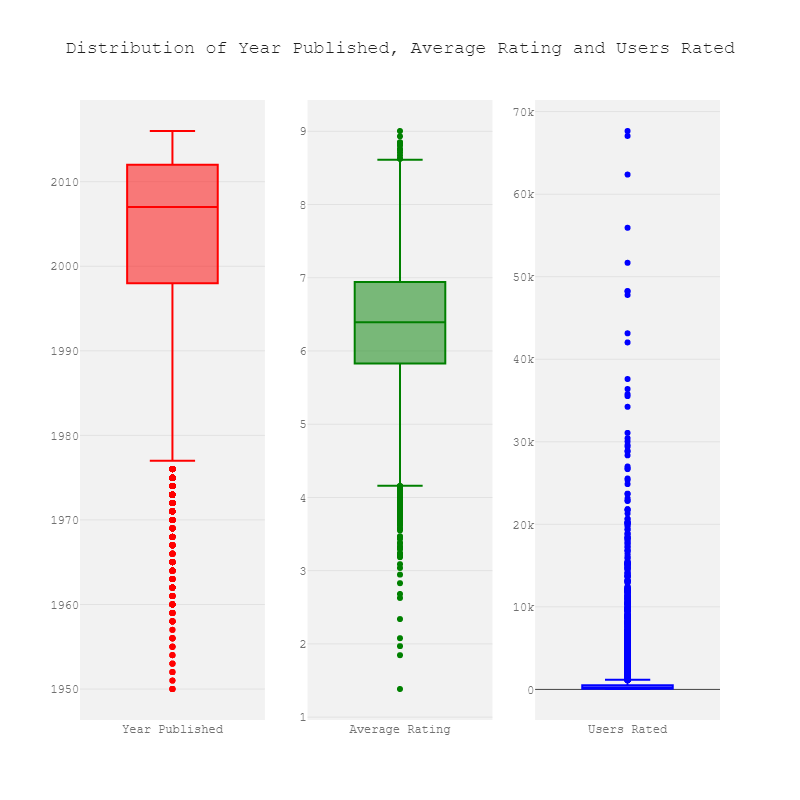

In [19]:
# Checking the distribution and outliers of the features 'year_published', 'average_rating', 'users_rated'

import plotly.io as pio
pio.renderers.default = "notebook"

fig = make_subplots(rows = 1, cols = 3)

fig.add_trace(go.Box(y = df['year_published'], name = 'Year Published',
                    marker_color = 'red', showlegend = False), row = 1, col = 1)

fig.add_trace(go.Box(y = df['average_rating'], name = 'Average Rating',
                    marker_color ='green', showlegend = False), row = 1, col = 2)

fig.add_trace(go.Box(y = df['users_rated'], name = 'Users Rated',
                    marker_color = 'blue', showlegend = False), row = 1, col = 3)

fig.update_layout(height = 800, width = 800,
                  title_text = 'Distribution of Year Published, Average Rating and Users Rated', template = custom_template)

fig.update_layout(title = {
    'y':0.95,
    'x':0.5})

fig.show(renderer = 'png') # renderer set only for displaying this plot on github as normal interactive plot is not displayed

**Missing values**

To better understand the proportions of missing values per column, a bar chart was plotted. As this is a visualization that does not require any type of interaction, Matplotlib was used to plot it.

The bars in this plot are red, as this colour is usually associated with warnings and danger in most of the occidental cultures. In games, red is also usually associated with enemies or the state of health and helps to focus on what is really important within the image (Gil, 2018). Thus, this colour is bringing the reader's attention to the importance of correcting any issues with the data source feeding instead of leaving the observations null so the dataset is more useful for gathering accurate insights and even modelling.

Apart from the general tweaks mentioned previously, in order to enhance the readability of the information, labels were added to the edge of the bars with the percentage value rounded.

No missing values will be dropped, in order to keep the most information from the dataset as possible. Thus, as all missing values are categorical, they were filled with "Unknown".

In [20]:
# Checking if there are any missing values

df.isna().values.any()

True

In [21]:
# Checking the total of missing values

print('There are a total of ' + (str(df.isna().sum().sum()) + ' missing values in the dataset.'))

There are a total of 24658 missing values in the dataset.


In [22]:
# Checking the total of missing values per column

df.isna().sum().sort_values(ascending = False)

compilation       10122
expansion          7780
family             2808
artist             2773
mechanic            950
designer            126
category             94
publisher             3
image                 1
thumbnail             1
game_id               0
average_rating        0
year_published        0
description           0
playing_time          0
name                  0
min_playtime          0
min_players           0
min_age               0
max_playtime          0
max_players           0
users_rated           0
dtype: int64

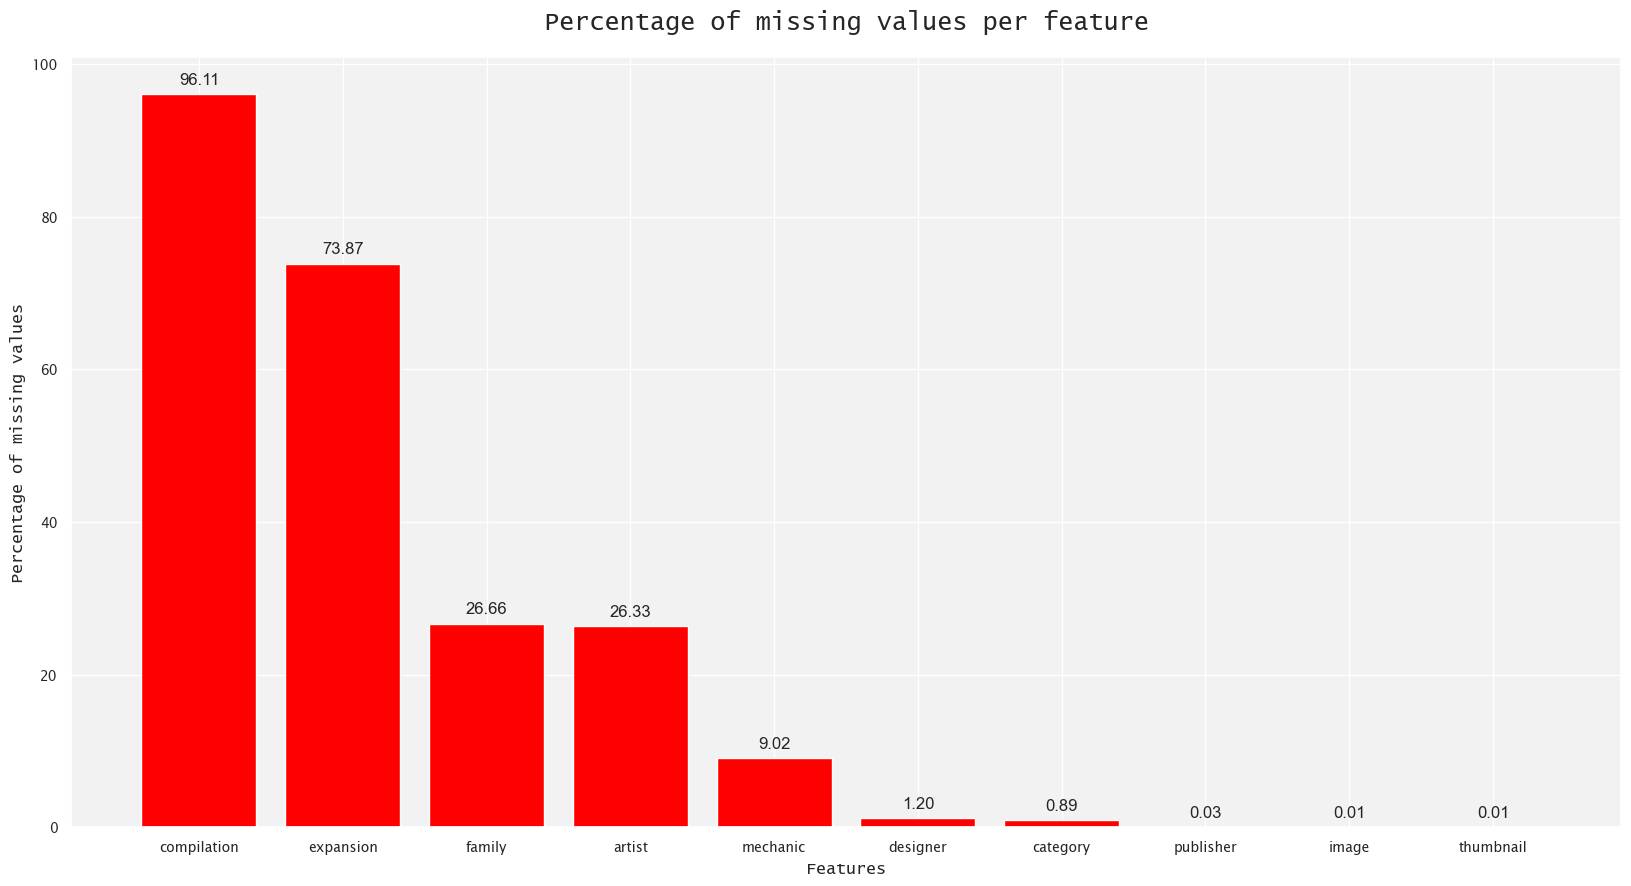

In [23]:
# Plotting the percentage of missing values per feature

df_na = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)
df_na = df_na[df_na[0] > 0]

fig, na = plt.subplots(figsize = (20, 10))

plot_na = na.bar(df_na.index, df_na.values.T[0], color = 'red')

na.bar_label(plot_na, label_type = 'edge', fmt = '%.2f', padding = 5)

plt.title('Percentage of missing values per feature', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('Features', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('Percentage of missing values',  fontname = 'Lucida Console', fontsize = 12)
plt.xticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

In [24]:
# Replacing the NaNs with "Unknown"

df2 = df.fillna('Unknown')
df2.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,//cf.geekdo-images.com/images/pic159509_t.jpg,1986,Marcus Gschwendtner,"Economic,Negotiation,Political",Unknown,Karl-Heinz Schmiel,Unknown,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,//cf.geekdo-images.com/images/pic184174_t.jpg,1981,Bob Pepper,"Card Game,Fantasy",Unknown,"G. W. ""Jerry"" D'Arcey",Unknown,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998,Franz Vohwinkel,"Abstract Strategy,Medieval",Unknown,Reiner Knizia,Unknown,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,//cf.geekdo-images.com/images/pic285299_t.jpg,1992,Unknown,Ancient,Unknown,Christian Beierer,Unknown,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,//cf.geekdo-images.com/images/pic342163_t.jpg,1964,"Scott Okumura,Peter Whitley",Economic,Unknown,Sid Sackson,Unknown,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [25]:
# Checking if there are any missing values

df2.isna().values.any()

False

## Data Visualization

### 1. What are the top 5 "average rated" games?

This visualization requires a fairly commom type of plot that was previously used (bars) and does not require interactivity. The library chosen in this case was Seaborn, that offers more customization options and can use the support of Matplotlib for adjusting details such as title, labels etc. The function "catplot" is being used instead of the usual "barplot". "This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations" (Waskom, 2021). The parameter "kind" accepts 8 types of plots, and "bar" is used in this case.

The colours of the bars used are assuming a colour-coded rank. There is not a single colour-coded rank for games, but many of them follow the a similar order, where orange (or gold) and purple are the most rare or precious items, sometimes called legendary and epic; blue and green are used for rare and uncommon; and grey and white are used for common itens. As white would not present a readability, the fifth colour for the graph is the grey. This specific order was based in the game World of Warcraft 2004 (Memmott, 2021).

Another tweak added to this graph is the limit of the y axis that was set to go from 8.5 to 9. As all games are rated within this range, this limit acts like a zoom in the bars, making the difference between the average ratings more noticeable.

In [26]:
# Sorting the data per average rating and assigning the result to a new dataframe "top_rating"

top_rating = df2.sort_values(by = 'average_rating', ascending = False)
top_rating.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
8348,140135,Small World's Designer Edition is a spare-no-e...,//cf.geekdo-images.com/images/pic2270432.jpg,6,80,8,2,40,Small World Designer Edition,80,//cf.geekdo-images.com/images/pic2270432_t.jpg,2015,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building","Small World,Small World: 6 Player Board,Small ...",Philippe Keyaerts,Unknown,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
6392,55690,Kingdom Death: Monster is a fully cooperative ...,//cf.geekdo-images.com/images/pic2931007.jpg,6,180,17,1,60,Kingdom Death: Monster,180,//cf.geekdo-images.com/images/pic2931007_t.jpg,2015,"Lokman Lam,Lorinda Tomko","Adventure,Fantasy,Horror,Mature / Adult,Miniat...",Unknown,Adam Poots,Kingdom Death: Monster – A Strange Spot and Be...,"Campaign Games,Crowdfunding: Kickstarter,Kingd...","Co-operative Play,Dice Rolling,Grid Movement,R...",Kingdom Death,8.93184,1954
9964,181289,"Terra Mystica: Big Box, a Korean crowdfunding ...",//cf.geekdo-images.com/images/pic2602334.jpg,5,150,12,2,60,Terra Mystica: Big Box,150,//cf.geekdo-images.com/images/pic2602334_t.jpg,2015,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Terra Mystica,Terra Mystica: Fire & Ice","Jens Drögemüller,Helge Ostertag",Unknown,Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.84862,109
8526,144574,(from MMP website:)&#10;&#10;Last Chance for V...,//cf.geekdo-images.com/images/pic1875530.jpg,2,60,15,2,60,Last Chance for Victory,60,//cf.geekdo-images.com/images/pic1875530_t.jpg,2014,"Dean Essig,Gettysburg Cyclorama","American Civil War,Civil War,Wargame",Unknown,Dean Essig,Unknown,Line of Battle Series,"Dice Rolling,Hex-and-Counter",Multi-Man Publishing,8.84603,88
9675,173504,"The Greatest Day: Sword, Juno, and Gold Beache...",//cf.geekdo-images.com/images/pic2422496.jpg,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,//cf.geekdo-images.com/images/pic2422496_t.jpg,2015,Nicolás Eskubi,"Wargame,World War II",Unknown,Adam Starkweather,Unknown,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83081,86


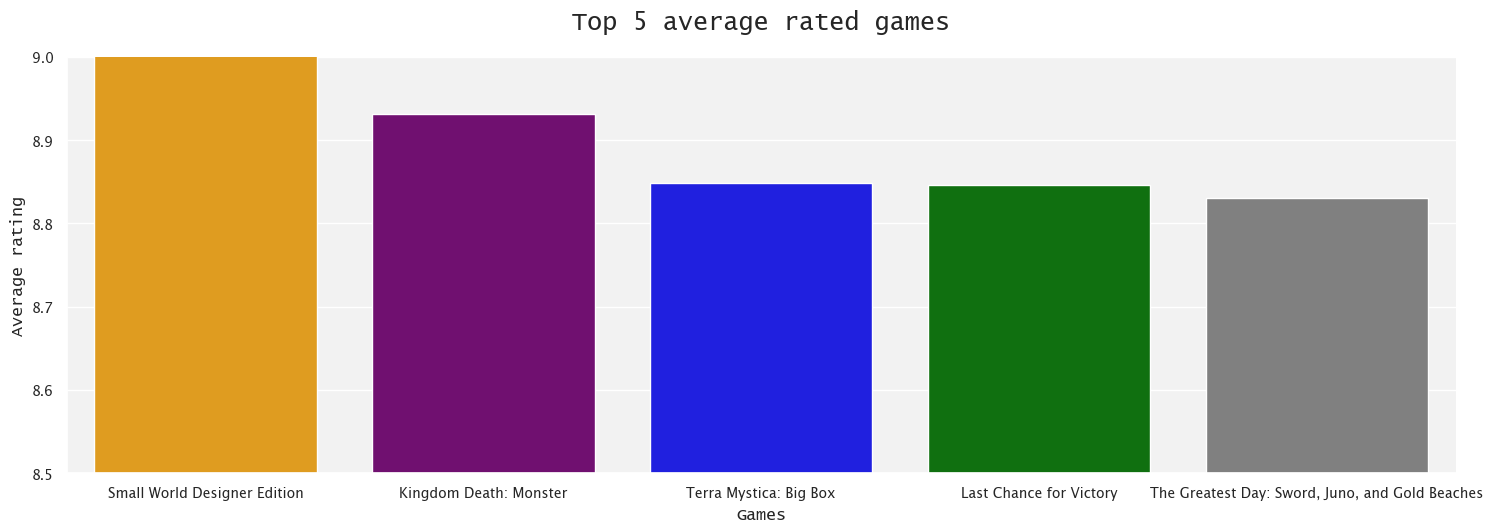

In [27]:
# Plotting top 5 average rated games

sns.catplot(data = top_rating.head(), x = 'name', y = 'average_rating', kind = 'bar', height = 5, aspect = 3,
                            palette = ['orange', 'purple', 'blue', 'green', 'grey']).set(ylim = (8.5, 9))

plt.title('Top 5 average rated games', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('Games', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('Average rating', fontname = 'Lucida Console', fontsize = 12)
plt.xticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

### 2. Is there a correlation between the “users_rated” and the “max_playtime”?

This graph contains two different elements: dots and line. Regarding the colours, blue and orange were chosen for representing the elements of the graph as those are complementary at the colour wheel. Various competitive games make use of two factions that compete against each other and this dichotomy demands a clear visual communication that is usually represented with two clearly different colours (Interama Games, 2016).

The plot do not show much initially. As "max_playtime" scale is impacted by some outliers, the dots are overlapping a lot and the line looks completely horizontal, showing no upwards or downwards trend. A second graph is plotted, then, including a log scale along the axis y, which improves the visualization as the dots are overlapping less than before. However, the downward trend of the line is still minimal, which implies a very weak negative linear correlation.

As graphs are better supported with values, this can be confirmed by plotting a Seaborn "heatmap" with the correlation coefficient produced with the Numpy function "corrcoef". The result, as shown, is -0.004, which corroborates that the correlation between "users_rated" and "max_playtime" is so extremely weak that it can be said inexistent. 

The heatmap is displayed slightly differently than the other plots:
* As there is not a lot of information to be shown, its size was reduced to (7, 7);
* There is no need for x and y labels as only two variables are being compared with each other (where there is the value 1, it means the variable is being compared with itself);
* Orange was chosen for the colour map, where the more faded the colour, the weaker the correlation.

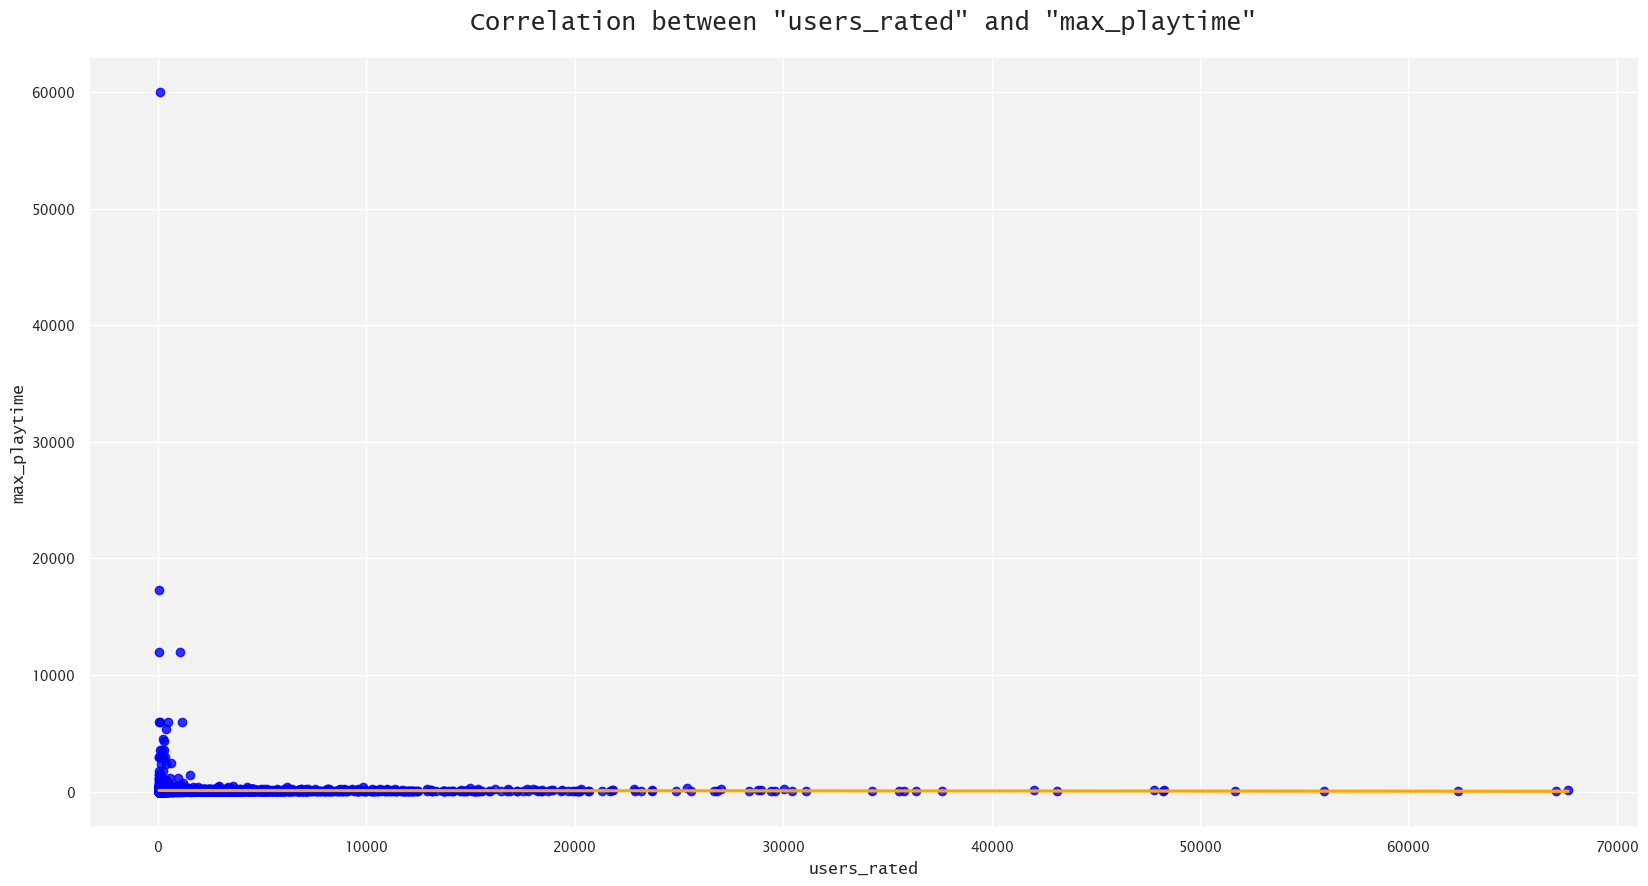

In [28]:
# Plotting a scatterplot to check the correlation between “users_rated” and “max_playtime”

fig = plt.gcf()
fig.set_size_inches(20, 10)

sns.regplot(data = df2, x = 'users_rated', y = 'max_playtime',
            scatter_kws = {'color': 'blue'}, line_kws = {'color': 'orange'})

plt.title('Correlation between "users_rated" and "max_playtime"', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('users_rated', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('max_playtime', fontname = 'Lucida Console', fontsize = 12)
plt.xticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

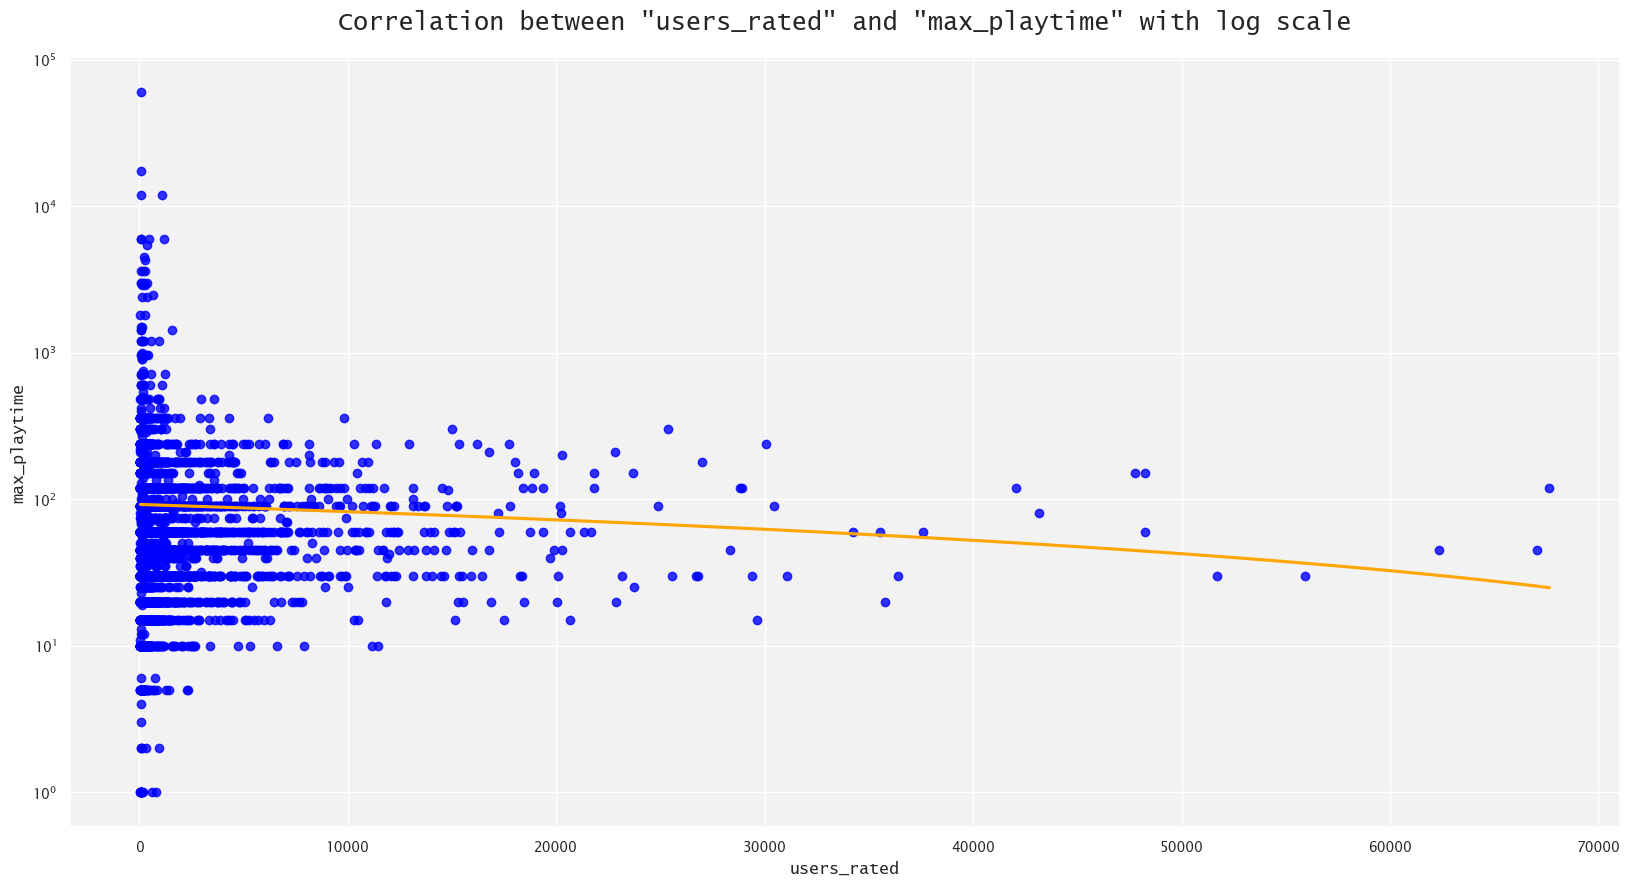

In [29]:
# Plotting a scatterplot to check the correlation between “users_rated” and “max_playtime” with log scale

fig = plt.gcf()
fig.set_size_inches(20, 10)

sns.regplot(data = df2, x = 'users_rated', y = 'max_playtime', ci = None,
            scatter_kws = {'color': 'blue'}, line_kws = {'color': 'orange'}).set_yscale('log')

plt.title('Correlation between "users_rated" and "max_playtime" with log scale',
          fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('users_rated', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('max_playtime', fontname = 'Lucida Console', fontsize = 12)
plt.xticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

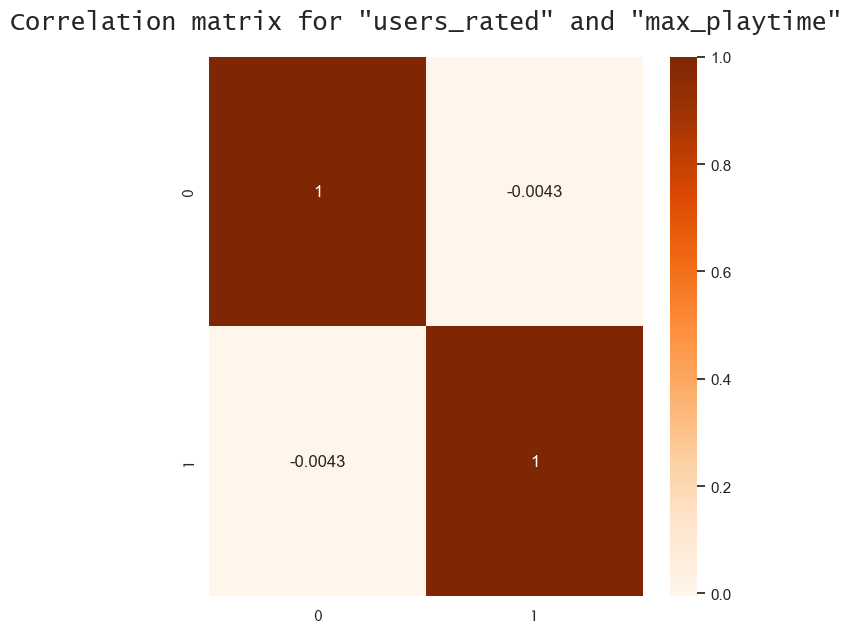

In [30]:
# Plotting a heatmap to check the correlation between “users_rated” and “max_playtime”

fig = plt.gcf()
fig.set_size_inches(7, 7)

sns.heatmap(np.corrcoef(df2['users_rated'], df2['max_playtime']), annot = True, cmap = 'Oranges')

plt.title('Correlation matrix for "users_rated" and "max_playtime"',
          fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

### 3. What is the distribution of game categories?

In this dataset, the column "category" has initially 3861 unique values. This can be explained by the fact that each game is associated with more than one category in the same observation, creating, then, multiple combinations of categories. In order to analyse individual categories, the functions "str.split" and "explode" are applied to the initial list and all the observations are split, where there is a comma, and exploded in new rows. After this step, 84 unique categories are identified with their respective count. Althout 84 is still a large number, it is much smaller than 3861.

As the list of unique categories has 84 items, this would be a lot of information for a pie chart. Hence, in this case, Seaborn "countplot" is being used to display, through bars, the counts of observations for each categorical bin. Once more, blue and orange were chosen as the colours of the bars. In this scenario, the dichotomy of the colours separate the most frequent categories from the less frequent ones. The "xticks" labels were rotated in 90 degrees to make it possible the display of all of them. From the bar chart plotted, it is possible to see that the most frequent category is "Card Game".

One way to plot a normalized distribution of the proportions of the categories is by applying the parameter "normalize = True" in the value counts list, which will transform the absolute count into a proportion. Then, Seaborn "kdeplot" is used to plot the distribution of the proportions, with the parameter "cut" set to zero, as no count can be negative. "Card Game" will be, for example, at the very end of the tail, as its frequency is 2981 out of the total of 27514 categories (over 10% or 0.10 as seen in the x-axis of the graph). In this case, it is possible to observe a highly skewed distribution.

Finally, another interesting way of displaying the frequency of the categories is through a word cloud. Although it is a less corporate format, the word cloud presented in the shape of the most frequent category makes it very quick to understand its importance for the industry. The "unique_cat_list" from the previous distribution graphs was exported to a .csv file in order to use it with the "WordCloud" library. The word cloud is generated with the background set to white colour, maximum of words to match the number of unique categories, a contour of blue colour and a colourful colormap called "prism", to facilitate the distinction between the categories. Also, an image of cards was imported and used as a mask, so the word cloud would be inside it.

In [31]:
# Checking the total of unique values in the column "category"

df2['category'].nunique()
print('There are a total of ' + (str(df2['category'].nunique()) + ' unique values in the category variable.'))

There are a total of 3861 unique values in the category variable.


In [32]:
# Checking the count of each value in the column "category"

df2['category'].value_counts()

Wargame,World War II                                                                    449
Card Game                                                                               438
Abstract Strategy                                                                       284
Napoleonic,Wargame                                                                      124
Economic                                                                                116
                                                                                       ... 
Book,Fantasy,Miniatures                                                                   1
Adventure,Card Game,Fantasy,Humor,Movies / TV / Radio theme                               1
Card Game,Deduction,Print & Play                                                          1
Card Game,Collectible Components,Comic Book / Strip,Science Fiction,Video Game Theme      1
Bluffing,Horror,Maze,Movies / TV / Radio theme,Science Fiction                  

In [33]:
# Splitting the values by the comma delimiter and exploding the individual values in a list of individual categories

unique_cat_list = df2['category'].str.split(',').explode('category')
unique_cat_list.value_counts()

Card Game                  2981
Wargame                    2034
Fantasy                    1218
Fighting                    900
Economic                    878
                           ... 
Pike and Shot                27
Game System                  22
American Indian Wars         15
Korean War                   14
Expansion for Base-game      11
Name: category, Length: 84, dtype: int64

In [34]:
# Transforming the list of individual categories in a dataframe

unique_cat_list = unique_cat_list.to_frame()
unique_cat_list.head()

,category
0,Economic
1,Negotiation
2,Political
3,Card Game
4,Fantasy


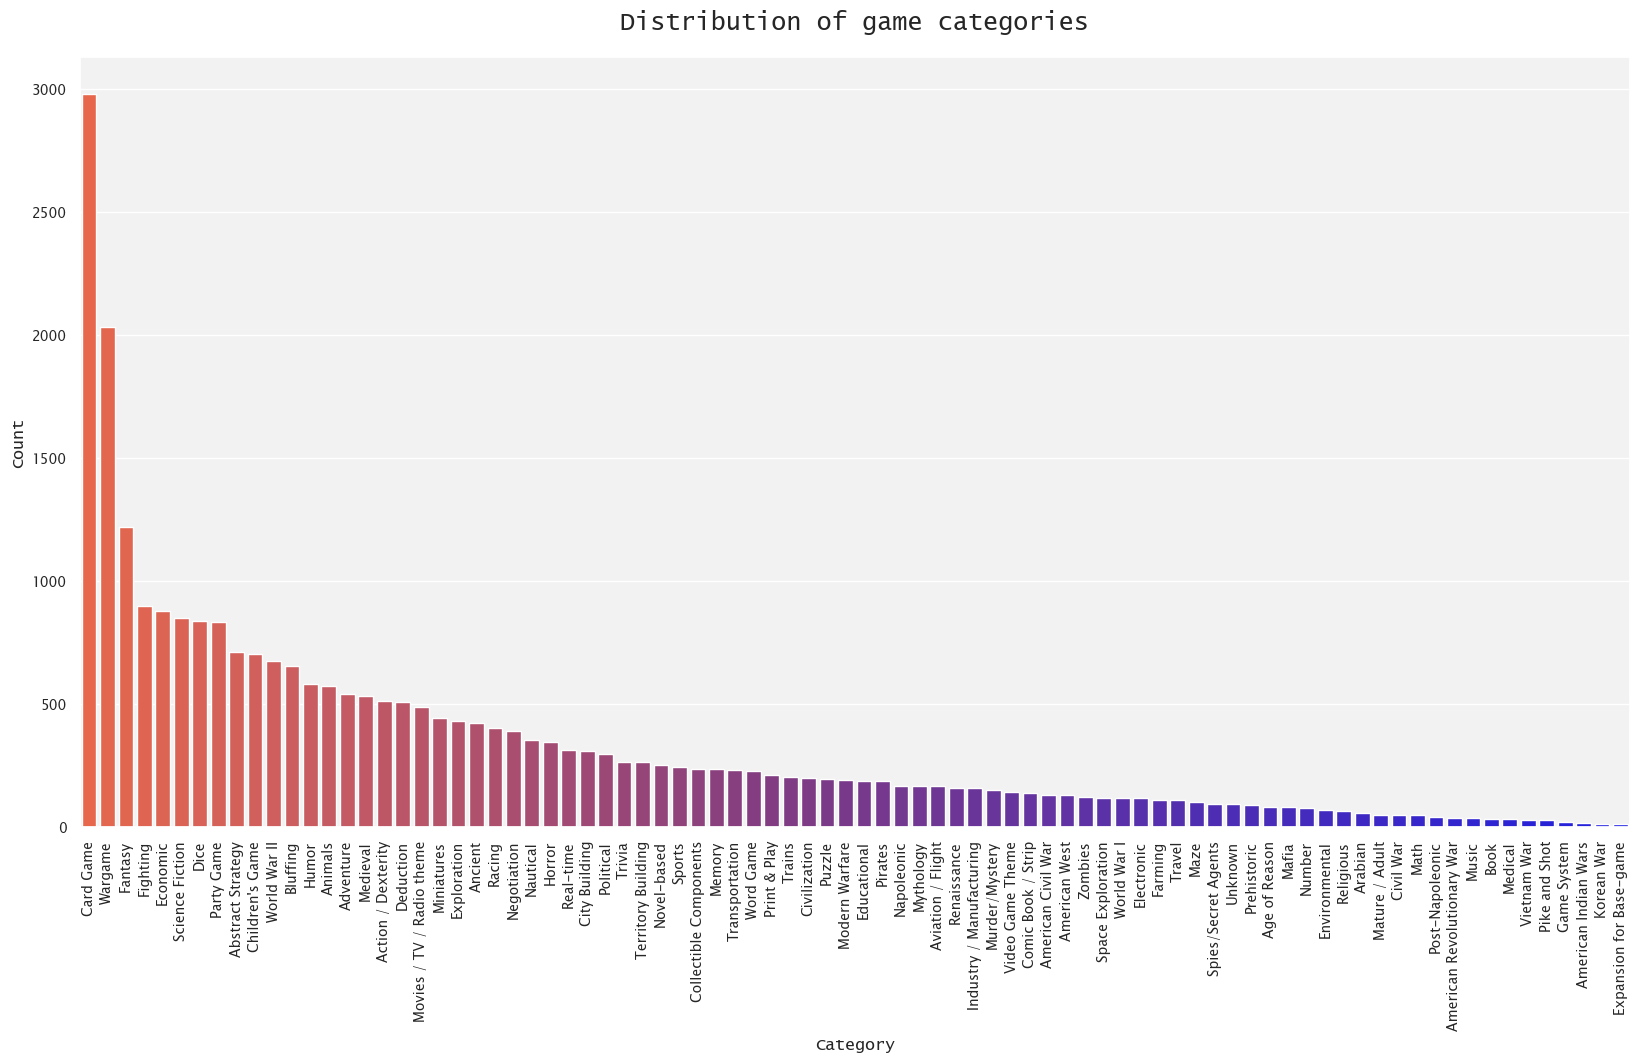

In [35]:
# Plotting the count distribution of the variable "category"

fig = plt.gcf()
fig.set_size_inches(20, 10)

sns.countplot(x = unique_cat_list['category'], order = unique_cat_list['category'].value_counts().index,
             palette = 'blend:#FF5733,#0000FF')

plt.title('Distribution of game categories', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('Category', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('Count', fontname = 'Lucida Console', fontsize = 12)
plt.xticks(rotation = 90, fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

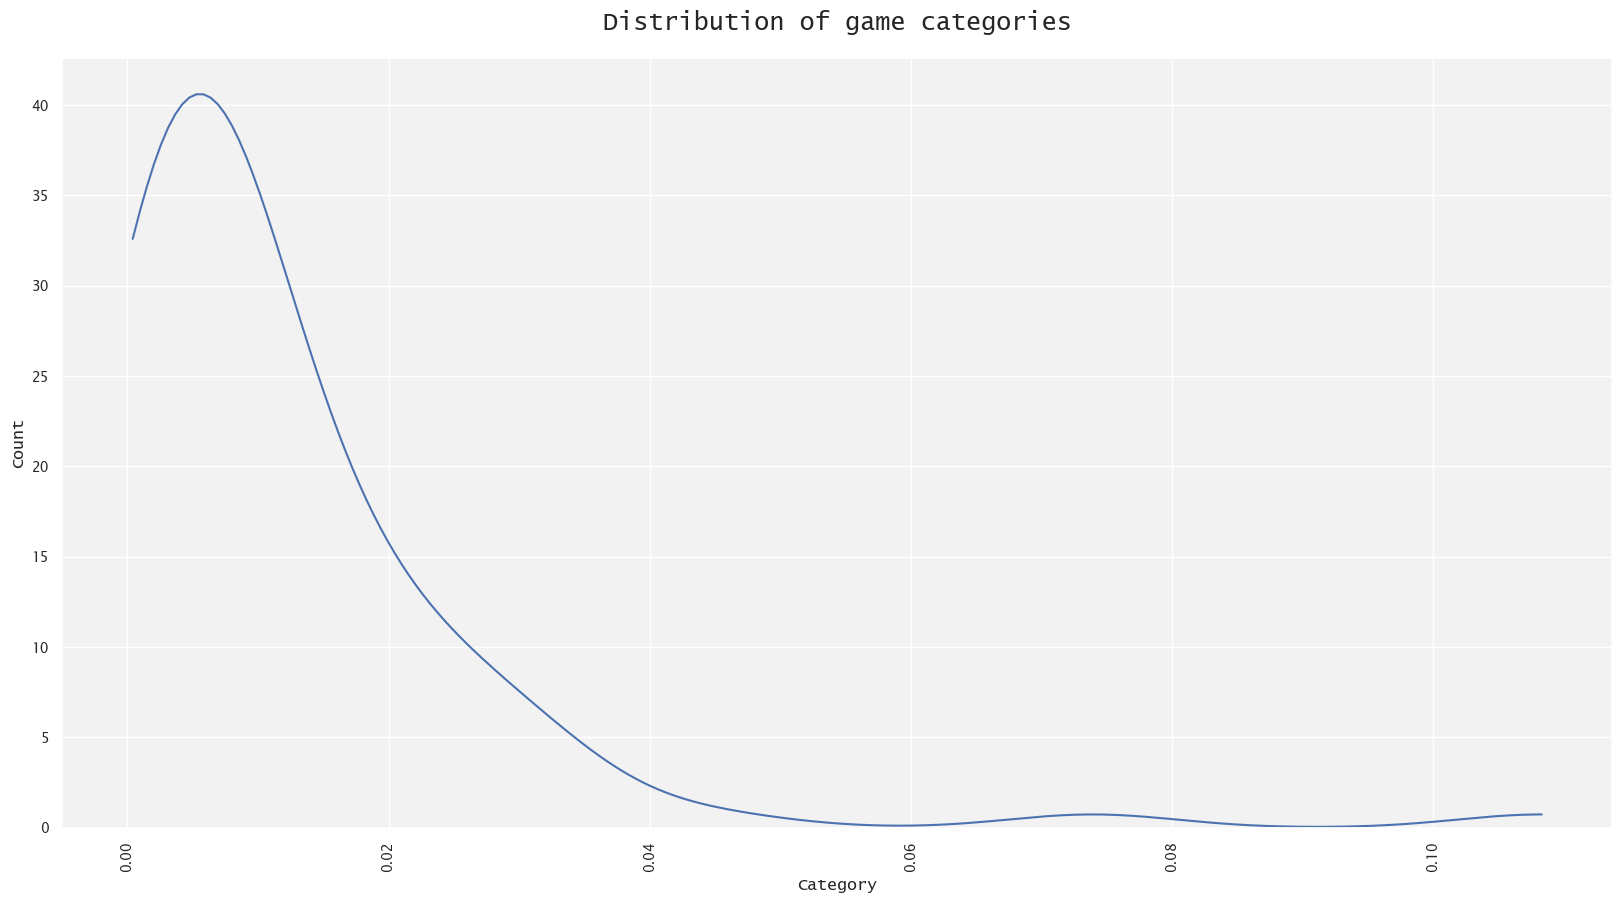

In [36]:
# Plotting the normalized distribution of the variable "category"

fig = plt.gcf()
fig.set_size_inches(20, 10)

sns.kdeplot(data = unique_cat_list.value_counts(normalize = True), cut = 0)

plt.title('Distribution of game categories', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('Category', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('Count', fontname = 'Lucida Console', fontsize = 12)
plt.xticks(rotation = 90, fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

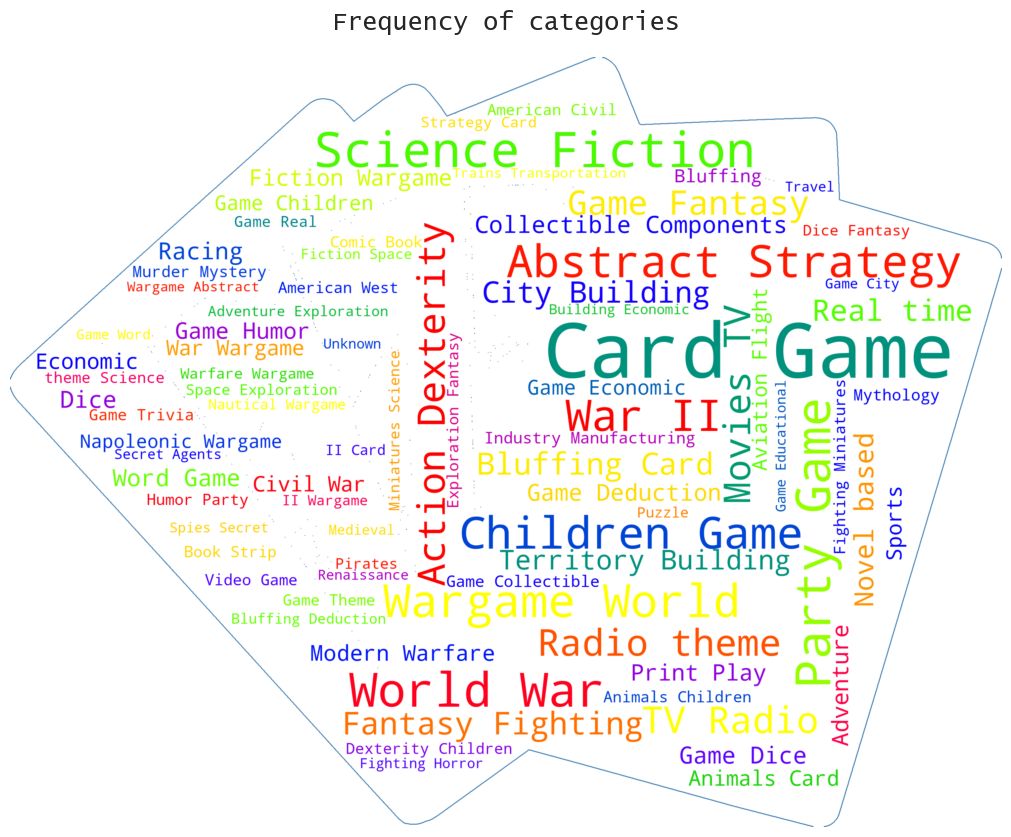

In [37]:
# Plotting the frequency of the variable "category"

d = path.dirname('unique_cat_list.csv')
text = open(path.join(d, 'unique_cat_list.csv')).read()

card_mask = np.array(Image.open(path.join(d, 'card-games.png')))

unique_cat_list_wc = WordCloud(background_color = 'white', max_words = 84, mask = card_mask,
                               contour_width = 3, contour_color = 'steelblue',
                               colormap = 'prism')

unique_cat_list_wc.generate(text)
unique_cat_list_wc.to_file(path.join(d, 'unique_cat_list_wc.png'))

plt.figure (figsize = (20, 10))
plt.title('Frequency of categories', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.imshow(unique_cat_list_wc, interpolation = 'bilinear')
plt.axis('off');

### 4. Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?

To analyse and compare the mean average rating throughout the years, a new dataframe "df_year_avgrate" was created with the variables needed ("year_published" and "average_rating") and sorted by year in ascending order. This new dataframe is then grouped by year while aggregating the average rate by the mean, generating a unique mean rating per year.

The "df_year_avgrate" generates, then, two new datasets: "df_year_avgrate_mean_older" which contains all the observations prior to 1993 and "df_year_avgrate_mean_newer" which keeps all the observations from 1993 onwards.

Again, Seaborn was the chosen library to plot a timeline of the mean average rating over the year. The final plot is a combination of two line plots for the "df_year_avgrate_mean_older" and "df_year_avgrate_mean_newer". And, once more, blue and orange were the chosen colours to show the contrast between older and newer games while keeping the visual unity with other plots.

With those two lines alone, it is already possible to visualize that older games have, instead, a lower mean average rating. However, to make it even quicker to obtain this information when visualizing the graph, two horizontal lines (axhline) were added with the overall mean for each period.

As per the tweaks, the line graph for the average rating of older games is thinner than the one for the newer games; the overall mean lines also differ in width and in style, while the line for older games is dashed, the line for newer games is composed by dashes and dots. Those changes would make it possible to read the graph even if it was printed in greyscale. Additionally, the "ci" was set to none in both graph lines as the confidence interval is not a parameter needed, and the legend for the horizontal lines was left at the top left corner, which is the most important place for information in the occidental culture.

The graph itself, the contrast of the colours and the position of the legend create an asymmetrical balance for the whole figure.

In [38]:
# Creating a new dataframe with the columns "year_published" and "average_rating", sorted by year

df_year_avgrate = df2[['year_published', 'average_rating']].sort_values(by = 'year_published', ascending = True)
df_year_avgrate.head()

,year_published,average_rating
2688,1950,5.46696
2074,1950,6.00230
3133,1950,6.54225
2463,1950,5.02264
662,1951,6.79954


In [39]:
# Obtaining the average rating per year

df_year_avgrate_mean = df_year_avgrate.groupby('year_published', as_index = False).agg({'average_rating': 'mean'})
df_year_avgrate_mean.head()

,year_published,average_rating
0,1950,5.758538
1,1951,5.711550
2,1952,5.680623
3,1953,4.639980
4,1954,5.654670


In [40]:
# Obtaining the average rating for games published before 1993 and from this year on

df_year_avgrate_mean_older = df_year_avgrate[(df_year_avgrate['year_published'] <= 1992)]
df_year_avgrate_mean_newer = df_year_avgrate[1992 < (df_year_avgrate['year_published'])]

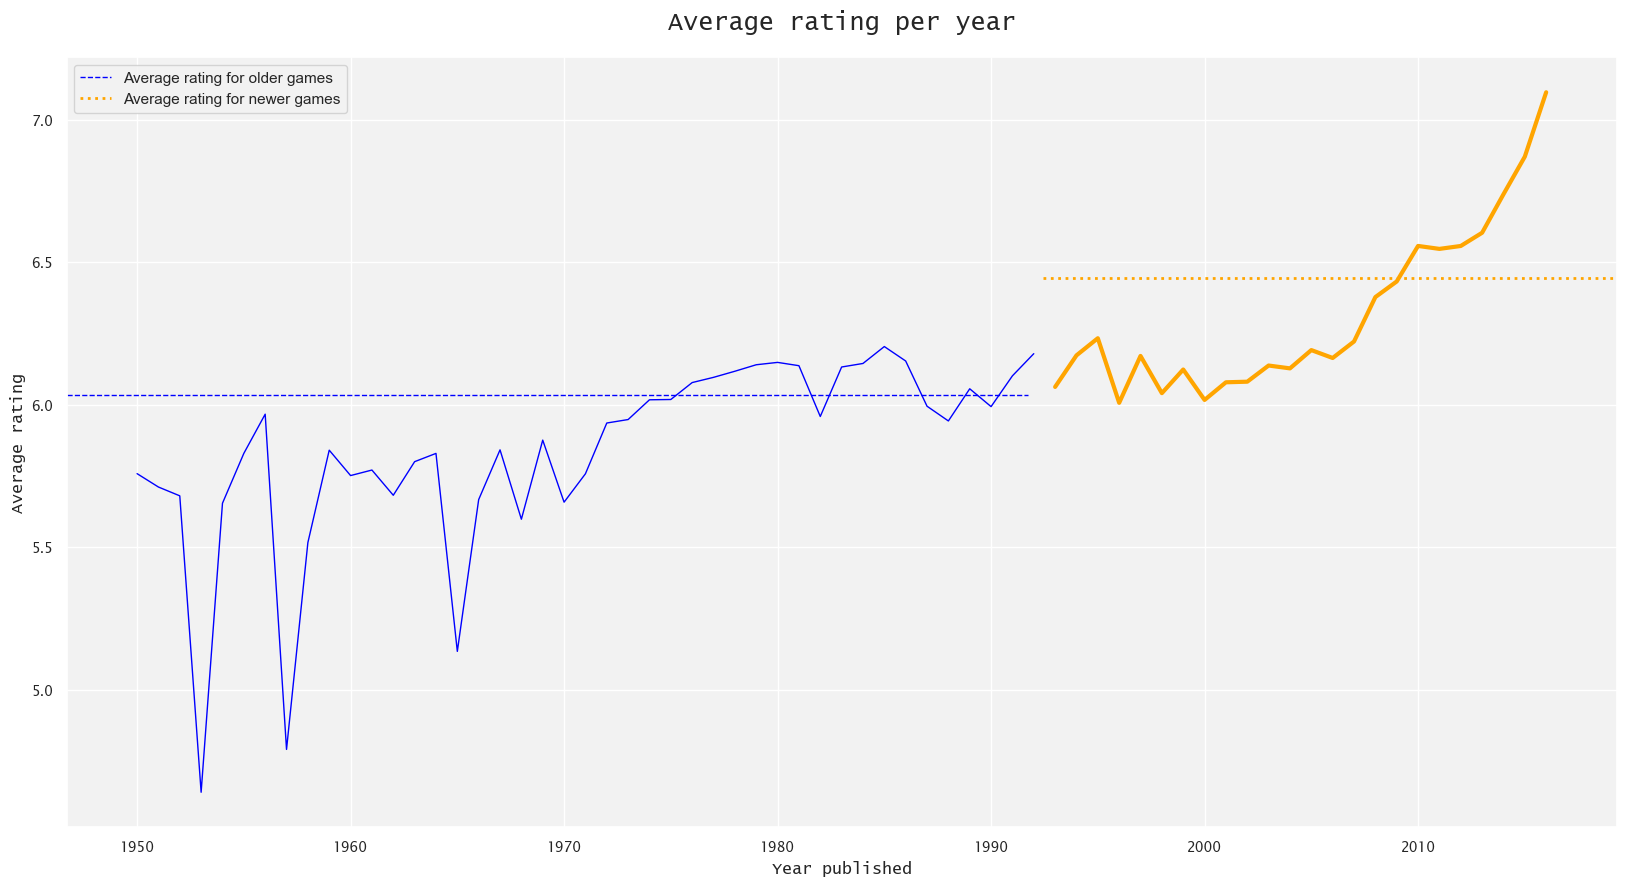

In [41]:
# Plotting the average rating per year: oder games vs newer games

fig = plt.gcf()
fig.set_size_inches(20, 10)

ax = sns.lineplot(data = df_year_avgrate_mean_older, x = 'year_published', y = 'average_rating', color = 'blue', ci = None,
                 linewidth = 1)
ax.axhline(y = df_year_avgrate_mean_older['average_rating'].mean(), color = 'blue', ls = '--', lw = 1, xmax = 0.62,
           label = 'Average rating for older games')

ax = sns.lineplot(data = df_year_avgrate_mean_newer, x = 'year_published', y = 'average_rating', color = 'orange', ci = None,
                 linewidth = 3)
ax.axhline(df_year_avgrate_mean_newer['average_rating'].mean(), color = 'orange', ls = ':', lw = 2, xmin = 0.63,
           label = 'Average rating for newer games')

plt.title('Average rating per year', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('Year published', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('Average rating', fontname = 'Lucida Console', fontsize = 12)
plt.xticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.legend();

In [42]:
#Printing the overall average rating for older and newer games

print('The average rating for older games is ' + (str(round(
    df_year_avgrate['average_rating'][(df_year_avgrate['year_published'] <= 1992)].mean(), 2)) + '.'))

print('The average rating for newer games is ' + (str(round(
    df_year_avgrate['average_rating'][1992 < (df_year_avgrate['year_published'])].mean(), 2)) + '.'))

The average rating for older games is 6.04.
The average rating for newer games is 6.45.


### 5. What are the 3 most common “mechanics” in the dataset?

This question follows a very similar approach to the first one (What are the top 5 "average rated" games?). Thus, to avoid repetition, a quicker overall of the steps will follow.

Regarding feature engineering, after splitting the observations by the commas and exploding the values, the list of unique mechanics is reduced from 3210 to 52 unique values. Then, those values were sorted in descending order, from the higher to the lower counts. From there, a new dataframe "unique_mec_list_top3" is created with the 3 larger counts, meaning the mechanics that are more frequent or more common among the board games.

Seaborn "catplot" is used to plot bars, but, in this case, only the first three colours are being used for rank: orange, purple and blue.

In [43]:
# Checking the total of unique values in the column "mechanic"

df2['mechanic'].nunique()
print('There are a total of ' + (str(df2['mechanic'].nunique()) + ' unique values in the category variable.'))

There are a total of 3210 unique values in the category variable.


In [44]:
# Checking the count of each value in the column "mechanic"

df2['mechanic'].value_counts()

Unknown                                                                                                   950
Hex-and-Counter                                                                                           523
Hand Management                                                                                           297
Dice Rolling                                                                                              222
Roll / Spin and Move                                                                                      199
                                                                                                         ... 
Auction/Bidding,Hand Management,Variable Phase Order,Voting                                                 1
Route/Network Building,Simulation,Stock Holding                                                             1
Action Point Allowance System,Dice Rolling,Press Your Luck,Variable Phase Order,Variable Player Powers      1
Hand Manag

In [45]:
# Splitting the values by the comma delimiter and exploding the individual values in a list of individual mechanics

unique_mec_list = df2['mechanic'].str.split(',').explode('mechanic')
unique_mec_list.value_counts().head()

Dice Rolling              2438
Hand Management           2176
Set Collection            1347
Hex-and-Counter           1244
Variable Player Powers    1223
Name: mechanic, dtype: int64

In [46]:
#Checking the total of unique mechanics

len(unique_mec_list.value_counts())

52

In [47]:
# Creating a new dataframe with the count of the 3 most common mechanics

unique_mec_list_top3 = unique_mec_list.value_counts().nlargest(3)
unique_mec_list_top3 = unique_mec_list_top3.to_frame()
unique_mec_list_top3.rename(columns = {'mechanic': 'count'}, inplace = True)
unique_mec_list_top3['mechanic'] = unique_mec_list_top3.index
unique_mec_list_top3.reset_index(drop = True, inplace = True)
unique_mec_list_top3

,count,mechanic
0,2438,Dice Rolling
1,2176,Hand Management
2,1347,Set Collection


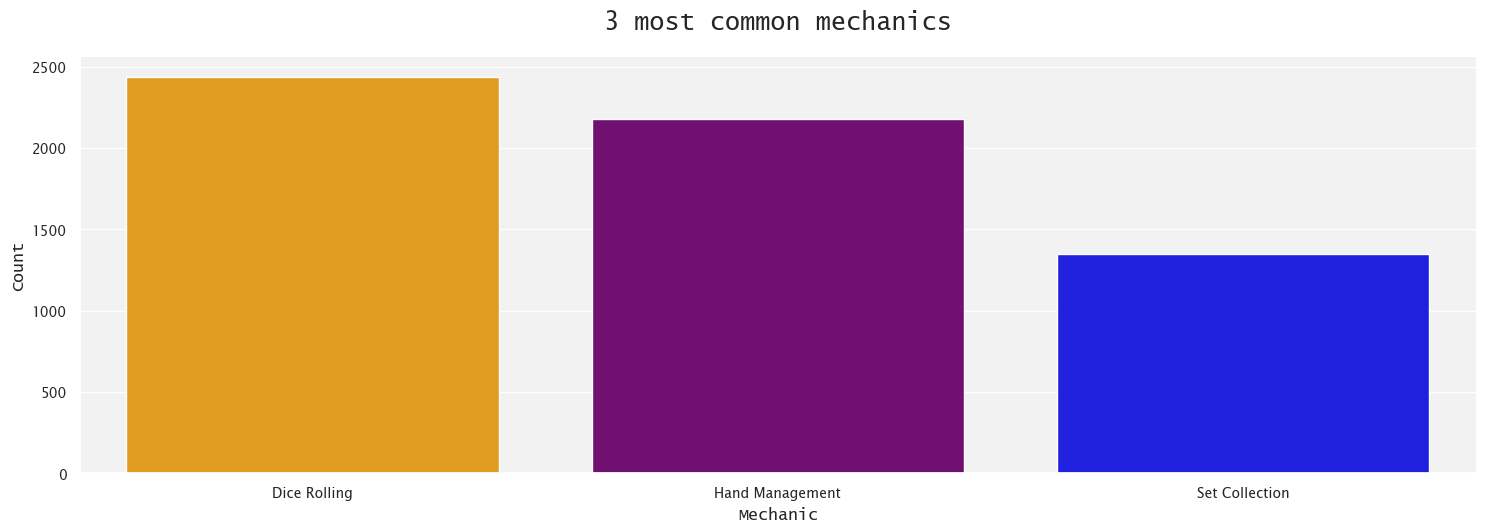

In [48]:
# Plotting the 3 most common mechanics

top3_mec = sns.catplot(data = unique_mec_list_top3, x = 'mechanic', y = 'count', kind = 'bar', height = 5, aspect = 3,
                      palette = ['orange', 'purple', 'blue'])

plt.title('3 most common mechanics', fontname = 'Lucida Console', fontsize = 18, pad = 20)
plt.xlabel('Mechanic', fontname = 'Lucida Console', fontsize = 12)
plt.ylabel('Count', fontname = 'Lucida Console', fontsize = 12)
plt.xticks(fontname = 'Lucida Sans Unicode', fontsize = 10)
plt.yticks(fontname = 'Lucida Sans Unicode', fontsize = 10);

### 6. What is the cumulative growth rate of the market in 2016, in terms of the number of games published?

In 1950, the first year of the dataset, the total amount of games published was 4, that would be where y = 0 in the graph, representing the initial point from where the percentage change happens every year by increasing or decreasing the number of games published. The cumulative growth rate reaches 1037% (10.37) in 2016, after a 17% decrease in regards to the previous year.

To find these values, the original dataset "df" was used. In this original dataset, all values for "game_id" are unique, which means each line represents a unique game. So, the variable "count" was created and the number 1 is assigned to each row to represent the count for each unique game. After this, the two columns needed for this graph ("year_published" and "count") were assigned to a new dataframe called "df_games_year", which was sorted in ascending order by year and then grouped by year with the sum of games per year. Finally, the column "pct_change" was created in this new dataframe, by applying the homonym pandas function to the column "count", which calculates the percentage of change between the current and a prior element.

A line graph was, then, plotted with the cumulative percentage change throughout the years. This time, Plotly was used to allow some interaction. By moving the mouse cursor along the line, it is possible to see the specific percentage change for every year from 1951 to 2016. Since 1950 is the initial year, there is no prior value to which it can be compared.

Green is commonly related to health, healing or teammates in gaming (DVNC TECH LLC, 2018). In occidental cultures, green is usually associated with positive situations such as permission (green lights) and completion (as in done tasks). As this is a positive information of a growing market, the green colour was attributed to the line.

In [49]:
# Creating a dataset with the count of games published and the percentage change of this count per year

df['count'] = 1
df_games_year = df[['year_published', 'count']].sort_values(
    by = 'year_published', ascending = True).groupby(by = ['year_published'], as_index = False).sum()

df_games_year['pct_change'] = df_games_year['count'].pct_change()
df_games_year.head()

,year_published,count,pct_change
0,1950,4,NaN
1,1951,2,-0.5
2,1952,3,0.5
3,1953,3,0.0
4,1954,3,0.0


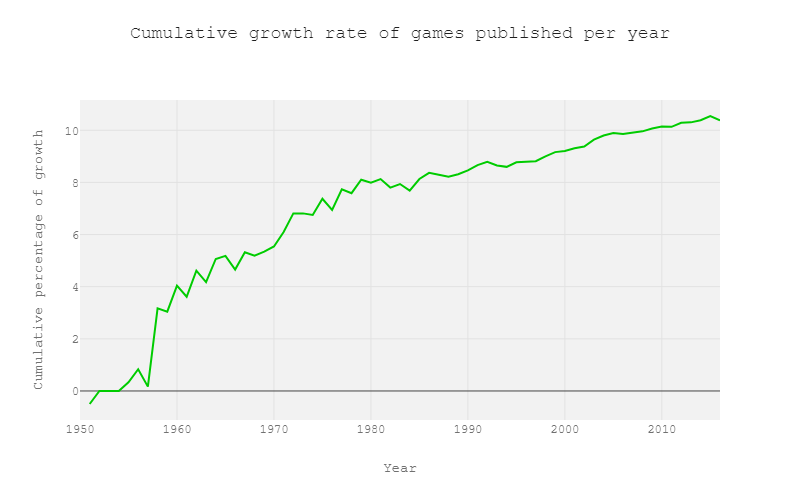

In [50]:
# Plotting the cumulative growth rate of games published per year

fig = px.line(df_games_year, x = 'year_published', y = df_games_year['pct_change'].cumsum(),
              title = 'Cumulative growth rate of games published per year')

fig.update_layout(title = {
        'y':0.95,
        'x':0.5,
        'xanchor': 'center'})

fig.update_layout(xaxis_title = 'Year',
                  yaxis_title = 'Cumulative percentage of growth',
                  showlegend = False, template = custom_template,
                  width = 800)

fig.data[0].line.color = 'rgb(0, 204, 0)'

fig.show(renderer = 'png') # renderer set only for displaying this plot on github as normal interactive plot is not displayed

### 7. Display the average rating of the categories of games published in the last 10 year and gather some insights from the graph.

The feature engineering applied in this question involves the previously mentioned function "str.split" and "explode", which, this time, are being applied in both "category" and "mechanic" variables. This exploded dataset is, then, sorted by "year_published" and a new dataframe is created "df_10y", where the year is larger than 2006.

Altair is the library used for this last graph. Although it was created especially for interactive plots, Altair has the powerful ability to work with categorical data and can easily bin continous data. Once more, blue and orange creates the dichotomy that makes it easy to identify the lowest and highest "average_ratings".

Some of the insights that can be extracted from this plot:
* The top 5 categories of 2007 are: Industry / Manufacturing, Napoleonic, Negotiation, Pre-Napoleonic, Print & Play;
* During 2008, 2009 and 2010, no category was rated above 8.
* 4 categories were between the top rated in 2015 and 2016: American Revolutionary War, Fighting (after a bad performance in 2014), Vietnam War and Wargame (also after a bad performance in 2014).

In [51]:
# Exploding the column "category" in the dataset

tag_cols = df2[['category']].columns
df2[tag_cols] = df2[tag_cols].apply(lambda col: col.str.split(','))

for col in tag_cols:
    df2 = df2.explode(col, ignore_index = True)
    
df2.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,//cf.geekdo-images.com/images/pic159509_t.jpg,1986,Marcus Gschwendtner,Economic,Unknown,Karl-Heinz Schmiel,Unknown,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,//cf.geekdo-images.com/images/pic159509_t.jpg,1986,Marcus Gschwendtner,Negotiation,Unknown,Karl-Heinz Schmiel,Unknown,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
2,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,//cf.geekdo-images.com/images/pic159509_t.jpg,1986,Marcus Gschwendtner,Political,Unknown,Karl-Heinz Schmiel,Unknown,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
3,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,//cf.geekdo-images.com/images/pic184174_t.jpg,1981,Bob Pepper,Card Game,Unknown,"G. W. ""Jerry"" D'Arcey",Unknown,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
4,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,//cf.geekdo-images.com/images/pic184174_t.jpg,1981,Bob Pepper,Fantasy,Unknown,"G. W. ""Jerry"" D'Arcey",Unknown,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478


In [52]:
# Displaying the shape of the exploded dataset

df2.shape

(27514, 22)

In [53]:
# Creating a new dataset for the last 10 years

df_10y = df2.sort_values(by = 'year_published', ascending = True)
df_10y = df2[df2['year_published'] > 2006]
df_10y.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
3824,2574,Originally self published by Mike Hayes in 197...,//cf.geekdo-images.com/images/pic1438091.jpg,7,360,12,2,360,Classic Warlord,360,//cf.geekdo-images.com/images/pic1438091_t.jpg,2012,"Mike Hayes,Tony Roberts",Modern Warfare,Unknown,Mike Hayes,Unknown,Unknown,"Area Control / Area Influence,Area Movement",(Self-Published),7.06927,167
3825,2574,Originally self published by Mike Hayes in 197...,//cf.geekdo-images.com/images/pic1438091.jpg,7,360,12,2,360,Classic Warlord,360,//cf.geekdo-images.com/images/pic1438091_t.jpg,2012,"Mike Hayes,Tony Roberts",Wargame,Unknown,Mike Hayes,Unknown,Unknown,"Area Control / Area Influence,Area Movement",(Self-Published),7.06927,167
4962,3627,Chaostle (k&acirc;'os'l) is a combination of t...,//cf.geekdo-images.com/images/pic987781.jpg,8,120,10,2,120,Chaostle,120,//cf.geekdo-images.com/images/pic987781_t.jpg,2011,"Sue Dawe,Britt Martin",Fantasy,Unknown,Mark Jacobs,Chaostle: Melee Expansion Set,Unknown,"Campaign / Battle Card Driven,Dice Rolling,Mod...",Chivalry Games,6.37459,222
4963,3627,Chaostle (k&acirc;'os'l) is a combination of t...,//cf.geekdo-images.com/images/pic987781.jpg,8,120,10,2,120,Chaostle,120,//cf.geekdo-images.com/images/pic987781_t.jpg,2011,"Sue Dawe,Britt Martin",Medieval,Unknown,Mark Jacobs,Chaostle: Melee Expansion Set,Unknown,"Campaign / Battle Card Driven,Dice Rolling,Mod...",Chivalry Games,6.37459,222
4964,3627,Chaostle (k&acirc;'os'l) is a combination of t...,//cf.geekdo-images.com/images/pic987781.jpg,8,120,10,2,120,Chaostle,120,//cf.geekdo-images.com/images/pic987781_t.jpg,2011,"Sue Dawe,Britt Martin",Miniatures,Unknown,Mark Jacobs,Chaostle: Melee Expansion Set,Unknown,"Campaign / Battle Card Driven,Dice Rolling,Mod...",Chivalry Games,6.37459,222


In [54]:
# Plotting a heatmap indicating the average rating across categories over the last 10 years

alt.data_transformers.enable('json')
alt.renderers.set_embed_options(renderer = 'svg', actions = False)

chart = alt.Chart(df_10y).mark_rect().encode(
    alt.X('year_published:Q', bin = True),
    alt.Y('category:N'),
    alt.Color('average_rating', bin = alt.Bin(maxbins = 10),
        scale = alt.Scale(scheme = 'blueorange'),
        legend = alt.Legend(title = 'Rating')),
    ).properties(width = 500, height = 800, title = 'Average rating of categories over the last 10 years')

chart.configure_title(
    font = 'Lucida Console',
    fontSize = 18,
    align = 'center')

alt.Chart(...)

# Conclusion

The market of Board Games has been growing in the past years and the internet plays an important role in this. In this report, Data Visualization techniques were applied in order to gather and analyze important insights that would help increase sales of a board game retail company.

Data Visualization is an important tool for communicating insights if used effectively. In order to make the plots more visually attractive, legible, readable and adequate for the business, fonts, colours and other aspects of each graph were changed and discussed.

The plots help the business to understand the top-rated games of all time, the most common categories and mechanics, the increase in the average rating of the newer games in comparison to the older ones, the exponential growth in the number of games published as well as the categories with the lowest and highest ratings over the last ten years. With those insights, decisions can be made in regard to sales strategy for the next year.